In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import swish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
#hi

In [17]:
df=pd.read_csv("data.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0
5,1980-03-24 00:00:00-05:00,0.176417,0.176417,0.173514,0.173514,8966400,0.0,0.0
6,1980-03-25 00:00:00-05:00,0.174240,0.177144,0.174240,0.174240,11347200,0.0,0.0
7,1980-03-26 00:00:00-05:00,0.174240,0.175692,0.172788,0.172788,16262400,0.0,0.0
8,1980-03-27 00:00:00-05:00,0.169884,0.169884,0.166980,0.166980,26918400,0.0,0.0
9,1980-03-28 00:00:00-05:00,0.173514,0.176417,0.173514,0.173514,20102400,0.0,0.0


In [19]:
df = df.drop(['Volume','Dividends','Stock Splits'], axis=1)
df.head(10)

,Date,Open,High,Low,Close
0,1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500
1,1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048
2,1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404
3,1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678
4,1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143
5,1980-03-24 00:00:00-05:00,0.176417,0.176417,0.173514,0.173514
6,1980-03-25 00:00:00-05:00,0.174240,0.177144,0.174240,0.174240
7,1980-03-26 00:00:00-05:00,0.174240,0.175692,0.172788,0.172788
8,1980-03-27 00:00:00-05:00,0.169884,0.169884,0.166980,0.166980
9,1980-03-28 00:00:00-05:00,0.173514,0.176417,0.173514,0.173514


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11289 entries, 0 to 11288
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11289 non-null  object 
 1   Open    11289 non-null  float64
 2   High    11289 non-null  float64
 3   Low     11289 non-null  float64
 4   Close   11289 non-null  float64
dtypes: float64(4), object(1)
memory usage: 441.1+ KB


In [23]:
df.describe()

,Open,High,Low,Close
count,11289.000000,11289.000000,11289.000000,11289.000000
mean,14.986168,15.185892,14.787731,14.985933
std,14.708247,14.892642,14.526521,14.709644
min,0.121968,0.121968,0.120516,0.120516
25%,0.810214,0.827638,0.797147,0.814571
50%,12.757638,12.917269,12.590077,12.742243
75%,22.624974,22.879999,22.350709,22.617407
max,62.028760,62.292520,60.600833,62.083344


In [25]:
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.date  # Specify utc=True

print(df.head())

         Date      Open      High       Low     Close
0  1980-03-17  0.181500  0.184404  0.181500  0.181500
1  1980-03-18  0.181500  0.182952  0.180048  0.180048
2  1980-03-19  0.184404  0.187308  0.184404  0.184404
3  1980-03-20  0.184403  0.186581  0.183678  0.183678
4  1980-03-21  0.180048  0.180048  0.177143  0.177143


In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [29]:
fig = px.line(y=df.Open, x=df.Date) 
fig.update_traces(line_color='blue')  
fig.update_layout(
    xaxis_title="Date",  
    yaxis_title="Scaled Price", 
    title={'text': "INTEL Stock Price Historic Data", 'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},  # Set plot title and position
    plot_bgcolor='rgba(0, 0, 0, 0)',  
)

fig.show(renderer='iframe')

In [31]:
test_size = df[df.Date.dt.year==2023].shape[0]
test_size

250

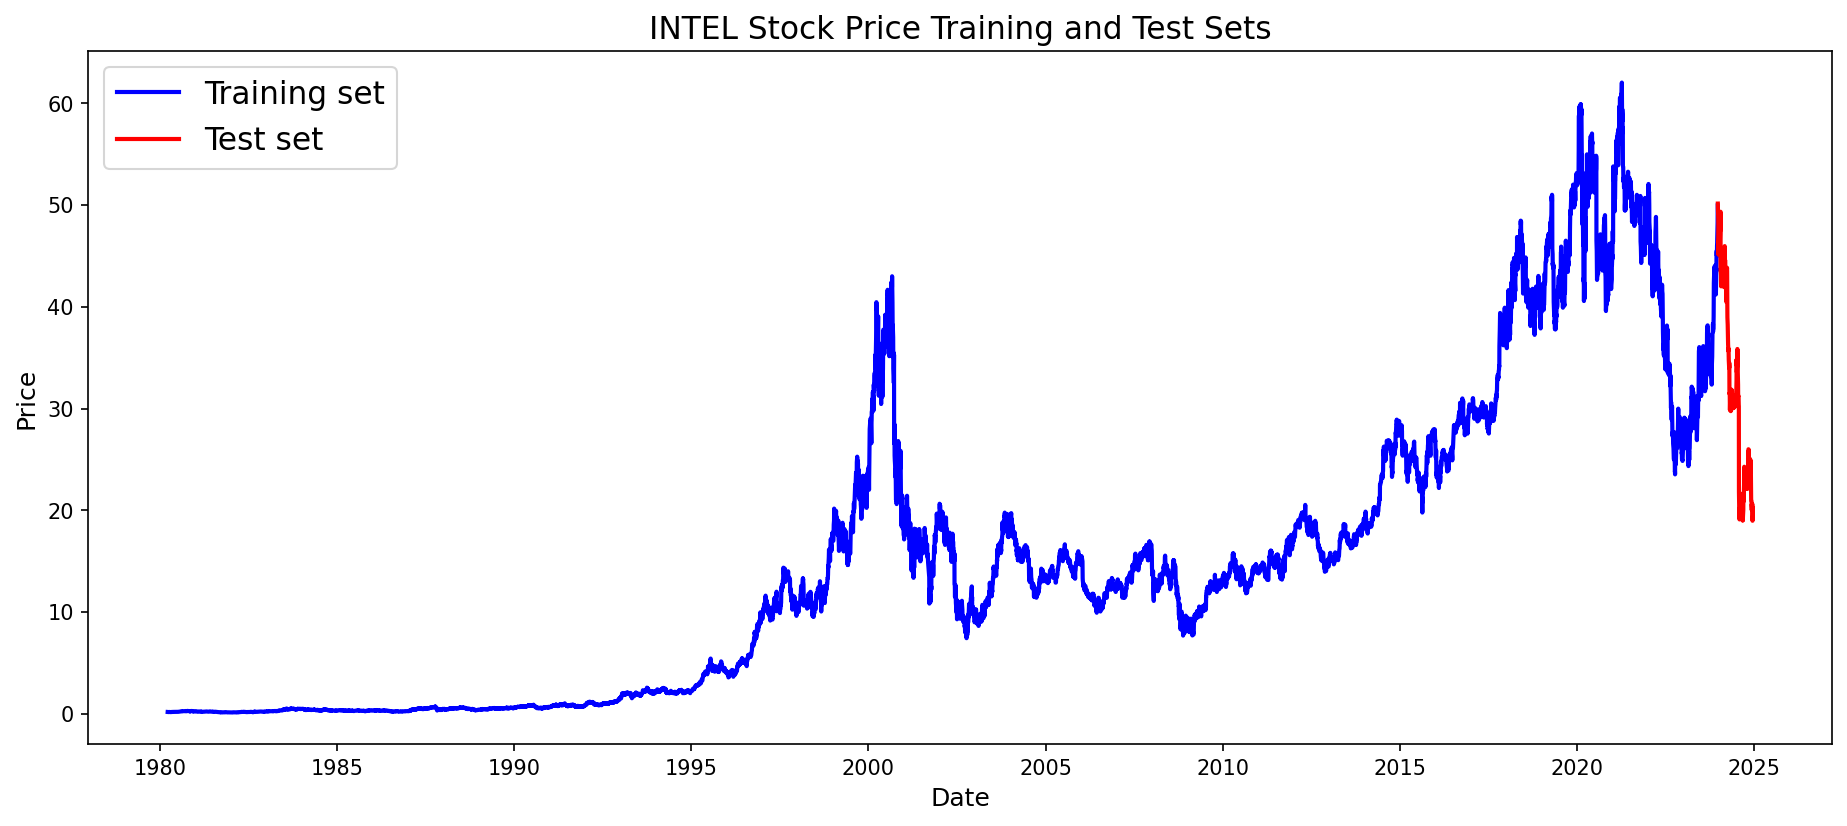

In [33]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(df.Date[:-test_size], df.Open[:-test_size], color='blue', lw=2)
plt.plot(df.Date[-test_size:], df.Open[-test_size:], color='red', lw=2)
plt.title('INTEL Stock Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [35]:
scaler = MinMaxScaler()
scaler.fit(df.Open.values.reshape(-1,1))

MinMaxScaler()

In [37]:
train_data = df.Open[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [41]:
window_size = 60

In [43]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [45]:
test_data = df.Open[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [47]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [49]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [51]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (10979, 60, 1)
y_train Shape:  (10979, 1)
X_test Shape:   (250, 60, 1)
y_test Shape:   (250, 1)


In [55]:
class Swish(Layer):
    def call(self, inputs):
        return inputs * tf.nn.sigmoid(inputs)

def define_model():
    input1 = Input(shape=(window_size, 1))
    x = LSTM(units=64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units=64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=64)(x)
    x = Dropout(0.2)(x)

    x = Dense(128, activation=Swish())(x)

    dnn_output = Dense(1, activation=Swish())(x)

    model = Model(inputs=input1, outputs=[dnn_output])

    # Use RMSprop optimizer
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop())
    model.summary()

    return model
model = define_model()
model.fit(X_train, y_train, epochs=15, batch_size=16, validation_split=0.2, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,393 (357.00 KB)

 Trainable params: 91,393 (357.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 2/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 5.5505e-04 - val_loss: 0.0023
Epoch 3/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4.6944e-04 - val_loss: 0.0042
Epoch 4/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 3.8944e-04 - val_loss: 0.0019
Epoch 5/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 4.2087e-04 - val_loss: 0.0038
Epoch 6/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 3.9006e-04 - val_loss: 0.0026
Epoch 7/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 3.3833e-04 - val_loss: 0.0033
Epoch 8/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 3.1347e-04 - val_loss: 0.0027
Epoch 9/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 3.2109e-04 - val_loss: 0.0029
Epoch 10/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 3.0208e-04 - val_loss: 0.0024
Epoch 11/15
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 2.8802e-04 - val_los

In [56]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [57]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [58]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.002788636600598693
Test MAPE: 0.08206679156552234
Test Accuracy: 0.9179332084344777


In [59]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

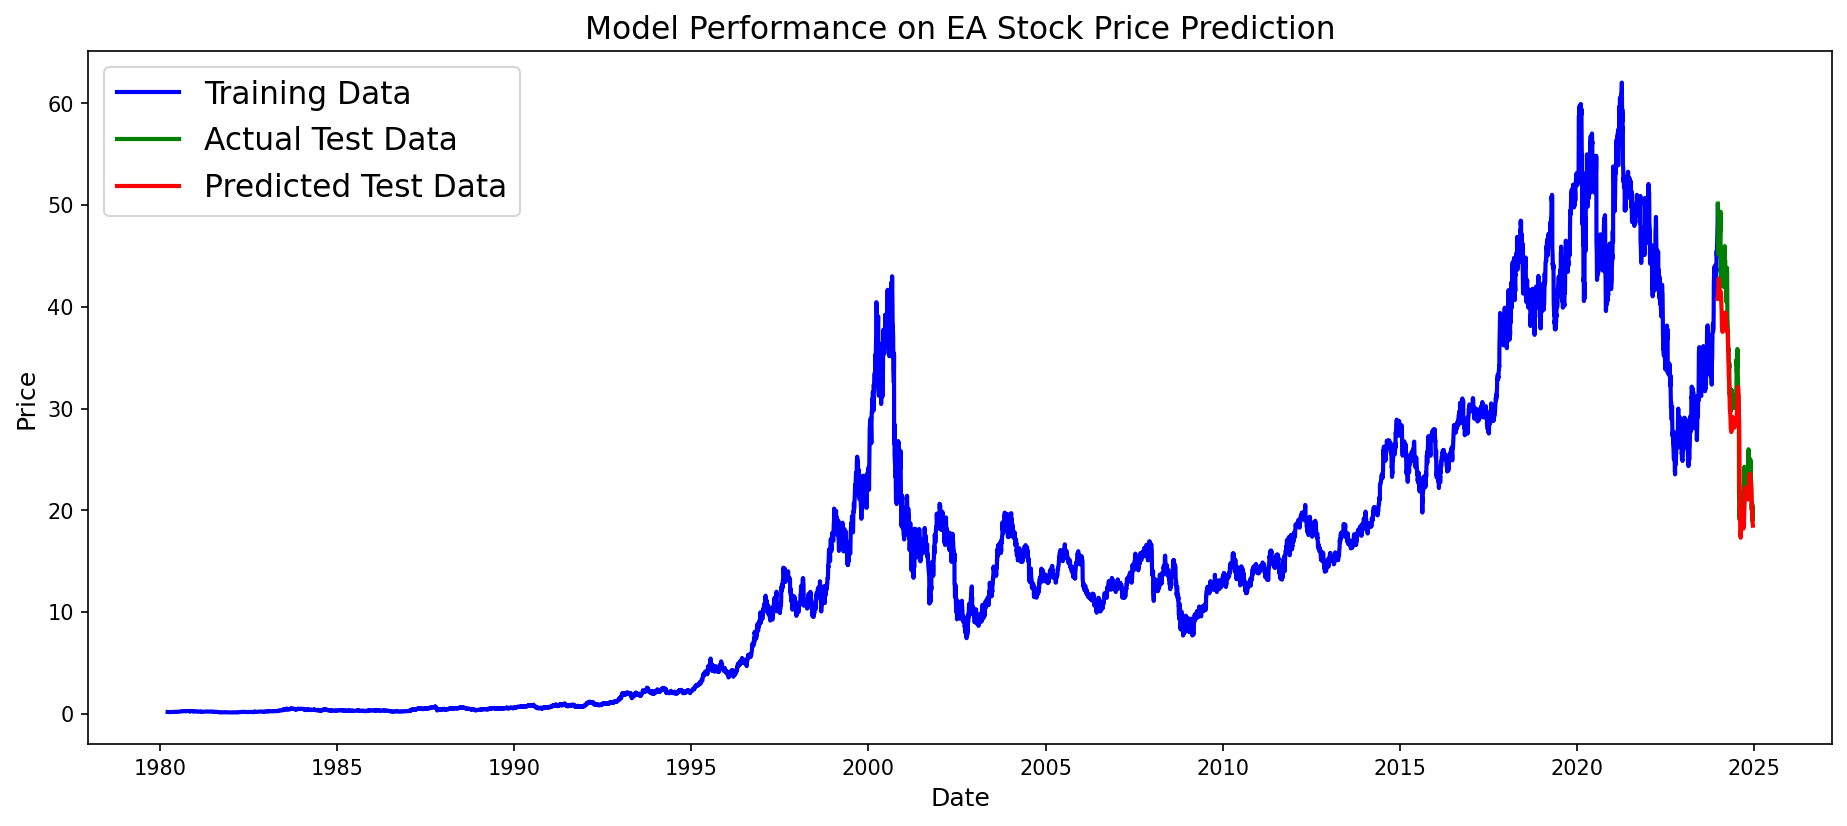

In [60]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='black')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='green', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on EA Stock Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()